# **FINANCE 361**

**Lecture 3**

## **Natural Language Processing (NLP) in Finance**

(The following Python code is non-examinable)

This notebook provides a few examples of NLP in finance to study sentiment and market events/trends.  


The notebook is used to facilitate discussion.

*   The coding approach does not align with the industry's best practices.
*   The code is instead designed to be easily understood and intuitive.

### **Preliminary Step #1**


*   Import en_core_web_sm
  *   A pipeline tool for NLP with Python
  *   See: https://spacy.io/models/en

In [1]:
import en_core_web_sm

nlp = en_core_web_sm.load()

*   Import nltk
  *   An NLP toolkit for Python
  *   See: https://www.nltk.org

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

*   Import the required packages into Python

In [32]:
from google.colab import files

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

import itertools
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import WordCloud

stop_words = set(stopwords.words('english'))

In [ ]:
for i, val in enumerate(itertools.islice(stop_words, 20)):
  print(val)

The following two lines of code are used in Google Colab to upload one or more files from a local file system into the Colab environment.

We'll upload:
* **The Financial Phrase Bank** (Malo et al., 2014): This dataset comprises business phrases that have been annotated with sentiment scores. You can download this dataset from the Hugging Face datasets repository:


> https://huggingface.co/datasets/financial_phrasebank/tree/main/data



*  **The Loughran-McDonald Dictionary**: This dictionary is the benchmark for anyone working with financial and accounting texts. It maps words to specific sentiment categories, providing a nuanced tool for textual analysis in economics and finance. Detailed information and download options are available at the official website:



> https://sraf.nd.edu/loughranmcdonald-master-dictionary/




In [5]:
upload = files.upload()

Saving Sentences_AllAgree.txt to Sentences_AllAgree.txt


In [6]:
upload = files.upload()

Saving Loughran-McDonald_MasterDictionary_1993-2023.csv to Loughran-McDonald_MasterDictionary_1993-2023.csv




---

### **Part I: Sentiment Analysis**

**Pre-processing text**

The following Python function, preprocess_text, performs several preprocessing steps on a given text to prepare it for natural language processing (NLP) tasks. These include:
* Converting all characters in the text to lowercase, to make the text case-insensitive
* Removing punctuation and non-alphanumeric characters: Uses a regular expression to remove any characters that are not alphanumeric (including punctuation), which helps in cleaning the text.
* Filtering out the stopwords, i.e., common words like "is", "and", "the", etc., that are often removed in NLP tasks because they carry less meaningful information.
* Lemmatization -- the process of reducing words to their base or dictionary form. For example, "running" becomes "run".

In [7]:
def preprocess_text(text, stopwrds):
  filtered_tokens = []

  # Convert text to lowercase
  text = text.lower()

  # Remove punctuation and non-alphanumeric characters using regular expression
  text = re.sub(r'\W+', ' ', text)

  # Tokenize text using NLTK
  word_tokens = word_tokenize(text)

  # Remove stop words
  if stopwrds:
    filtered_tokens = [word for word in word_tokens if word not in stop_words]

    # Reconstruct the text without stop words
    text = ' '.join(filtered_tokens)

  # Use spaCy for lemmatization
  doc = nlp(text)
  lemmatized_text = " ".join([token.lemma_ for token in doc])

  return lemmatized_text

The following two code blocks read the Financial Phrase Bank texts into a Pandas dataframe and then pre-process them using the preprocess_text function.

In [8]:
df_phrases = pd.read_csv('Sentences_AllAgree.txt', delimiter='@', encoding='latin-1', on_bad_lines='skip', names=['Phrase', 'Sentiment']) # encoding='latin-1',
df_phrases

,Phrase,Sentiment
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive
...,...,...
2259,Operating result for the 12-month period decre...,negative
2260,HELSINKI Thomson Financial - Shares in Cargote...,negative
2261,LONDON MarketWatch -- Share prices ended lower...,negative
2262,Operating profit fell to EUR 35.4 mn from EUR ...,negative


In [9]:
df_phrases['Pre_Processed'] = df_phrases['Phrase'].apply(lambda x: preprocess_text(x, True))
df_phrases['Pre_Processed_w_stopwords'] = df_phrases['Phrase'].apply(lambda x: preprocess_text(x, False))
df_phrases

,Phrase,Sentiment,Pre_Processed,Pre_Processed_w_stopwords
0,"According to Gran , the company has no plans t...",neutral,accord gran company plan move production russi...,accord to gran the company have no plan to mov...
1,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter 2010 componenta net sale double e...,for the last quarter of 2010 componenta s net ...
2,"In the third quarter of 2010 , net sales incre...",positive,third quarter 2010 net sale increase 5 2 eur 2...,in the third quarter of 2010 net sale increase...
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive,operating profit rise eur 13 1 mn eur 8 7 mn c...,operating profit rise to eur 13 1 mn from eur ...
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive,operate profit total eur 21 1 mn eur 18 6 mn 2...,operate profit total eur 21 1 mn up from eur 1...
...,...,...,...,...
2259,Operating result for the 12-month period decre...,negative,operate result 12 month period decrease profit...,operate result for the 12 month period decreas...
2260,HELSINKI Thomson Financial - Shares in Cargote...,negative,helsinki thomson financial share cargotec fall...,helsinki thomson financial share in cargotec f...
2261,LONDON MarketWatch -- Share prices ended lower...,negative,london marketwatch share price end low london ...,london marketwatch share price end lower in lo...
2262,Operating profit fell to EUR 35.4 mn from EUR ...,negative,operating profit fall eur 35 4 mn eur 68 8 mn ...,operating profit fall to eur 35 4 mn from eur ...


**Bag of Words (document-term matrix)**

The following code block performs a Bag of Words (BoW) transformation on the pre-processed phrases and then visualizes the most common words found in those phrases.


*   CountVectorizer - a method for converting text data into a matrix of token counts. Each row corresponds to a document (in this case, a processed phrase) and each column represents a unique word across all documents, i.e., a document-term matrix.
*   word_sum - sums the occurrences for each word across all phrases, and then this sum is then sorted in descending order to identify the most common words.



In [28]:
# BoW Transformation

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_phrases['Pre_Processed'])
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

word_sum = df_bow.sum(axis=0).sort_values(ascending=False)

print(df_bow.iloc[2000:2031, 1270:1275])

      community  companiesandmarket  company  comparable  comparative
2000          0                   0        0           0            0
2001          0                   0        1           0            0
2002          0                   0        0           0            0
2003          0                   0        0           0            0
2004          0                   0        0           0            0
2005          0                   0        0           0            0
2006          0                   0        0           0            0
2007          0                   0        0           0            0
2008          0                   0        0           0            0
2009          0                   0        0           0            0
2010          0                   0        1           0            0
2011          0                   0        0           0            0
2012          0                   0        1           0            0
2013          0     

The most common words are then graphically illustrated with the plots in the following code block.

<ipython-input-36-987b79d30fa4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_sum[:25].values, y=word_sum[0:25].index, palette='viridis')


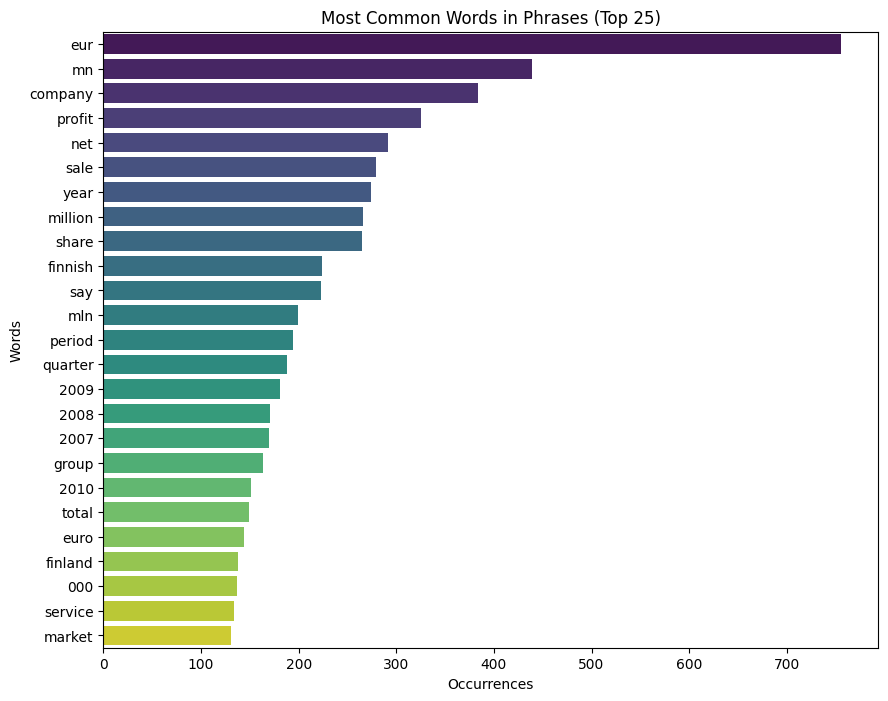

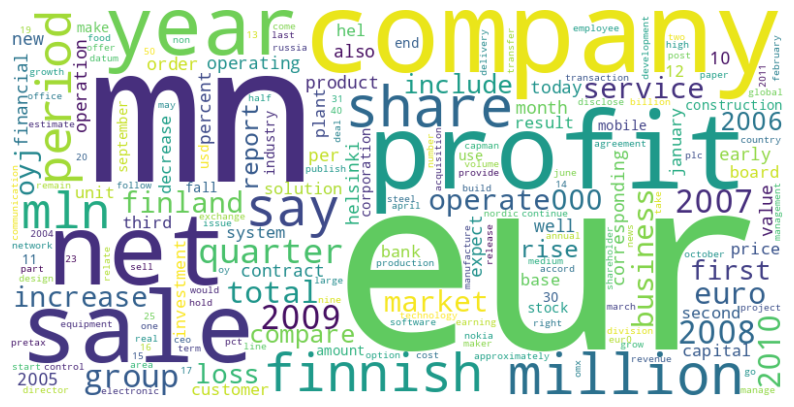

In [36]:
# Visualization - Barplot

plt.figure(figsize=(10, 8))
sns.barplot(x=word_sum[:25].values, y=word_sum[0:25].index, palette='viridis')
plt.title('Most Common Words in Phrases (Top 25)')
plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.show()

print('\n')

# Visualization - Word cloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_sum)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Sentiment analysis**

Now, we can compare the human annotated sentiment identfied in the Financial Phrase Bank to the sentiment identified by the Loughran-McDonald Dictionary.

To do this:
* First, load the Loughran-McDonald Dictionary into a Pandas dataframe, df_dictionary.
* Then, create lists for the positive words, positive_words, and negative words, negative_words, identified in the dictionary (making the words lower case and lemmatizing).

In [37]:
df_dictionary = pd.read_csv('Loughran-McDonald_MasterDictionary_1993-2023.csv', delimiter=',', on_bad_lines='skip', header=0)
# print(df_dictionary.head())

negative_words = list(df_dictionary[df_dictionary['Negative'] > 0]['Word'].str.lower())
positive_words = list(df_dictionary[df_dictionary['Positive'] > 0]['Word'].str.lower())

In [40]:
def lemma_words(word_lst):

  lemma_word_lst = []

  # Process each word with spaCy to obtain its lemma
  for word in word_lst:
    # Process the word to create a document object
    doc = nlp(word)
    # Since each 'word' is actually just one word, we can take the lemma of the first token
    lemmatized_word = doc[0].lemma_
    # Append the lemmatized word to the list
    lemma_word_lst.append(lemmatized_word)

  return list(set(lemma_word_lst))


positive_words = lemma_words(positive_words)
negative_words = lemma_words(negative_words)

for word in negative_words[:10]:
  print(word)

revoke
weakly
countermeasure
insolvency
foreclosure
sabotage
disallow
embarrass
mismanage
reassignment


For each phrase in the Financial Phrase Bank, we can determine the sentiment identified by the Loughran-McDonald Dictionary as the difference between the number of positive words and the number of negative words in each Phrase.

In [41]:
def sentiment_difference(phrase):
  tokens = phrase.split()

  positive_count = sum(token in positive_words for token in tokens)
  negative_count = sum(token in negative_words for token in tokens)

  return positive_count - negative_count

df_phrases['LM_Sentiment'] = df_phrases['Pre_Processed_w_stopwords'].apply(sentiment_difference)

df_phrases

,Phrase,Sentiment,Pre_Processed,Pre_Processed_w_stopwords,LM_Sentiment
0,"According to Gran , the company has no plans t...",neutral,accord gran company plan move production russi...,accord to gran the company have no plan to mov...,0
1,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter 2010 componenta net sale double e...,for the last quarter of 2010 componenta s net ...,-1
2,"In the third quarter of 2010 , net sales incre...",positive,third quarter 2010 net sale increase 5 2 eur 2...,in the third quarter of 2010 net sale increase...,0
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive,operating profit rise eur 13 1 mn eur 8 7 mn c...,operating profit rise to eur 13 1 mn from eur ...,0
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive,operate profit total eur 21 1 mn eur 18 6 mn 2...,operate profit total eur 21 1 mn up from eur 1...,0
...,...,...,...,...,...
2259,Operating result for the 12-month period decre...,negative,operate result 12 month period decrease profit...,operate result for the 12 month period decreas...,0
2260,HELSINKI Thomson Financial - Shares in Cargote...,negative,helsinki thomson financial share cargotec fall...,helsinki thomson financial share in cargotec f...,-3
2261,LONDON MarketWatch -- Share prices ended lower...,negative,london marketwatch share price end low london ...,london marketwatch share price end lower in lo...,-1
2262,Operating profit fell to EUR 35.4 mn from EUR ...,negative,operating profit fall eur 35 4 mn eur 68 8 mn ...,operating profit fall to eur 35 4 mn from eur ...,1




---



**What empirical results are there regarding sentiment predicting returns?**

* Tetlock, P. C. (2007). Giving content to investor sentiment: The role of media in the stock market. The Journal of Finance, 62(3), 1139–1168.

> https://www.jstor.org/stable/4622297
> https://papers.ssrn.com/sol3/papers.cfm?abstract_id=685145


* Garcia, D. (2013). Sentiment during recessions. The Journal of Finance, 68(3), pp. 1267-1300


> https://www.jstor.org/stable/42002620
> https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1571101


* Birru, J., & Young, T. (2022). Sentiment and uncertainty. Journal of Financial Economics, 146(3), 1148–1169.

> https://www.sciencedirect.com/science/article/abs/pii/S0304405X2200112X



**What about media other than newspapers?**

* Das, S. R., & Chen, M. Y. (2007). Yahoo! for Amazon: Sentiment Extraction from Small Talk on the Web. Management Science, 53(9), 1375–1388.

> https://www.jstor.org/stable/20122297


* Hailiang Chen, Prabuddha De, Yu Jeffrey Hu, & Byoung-Hyoun Hwang. (2014). Wisdom of crowds: the value of stock opinions transmitted through social media. The Review of Financial Studies.


> https://doi.org/10.1093/rfs/hhu001




**What are the disadvantages of lexicon-based dictionary methods?**



*    
*    



**How can these disadvantages be overcome with ML methods?**



*    
*     

* Large language models (LLM) in Finance Applications
-- Araci, D. (2019). FinBERT: Financial Sentiment Analysis with Pre-trained Language Models. In arXiv [cs.CL]. arXiv. http://arxiv.org/abs/1908.10063
-- Lopez-Lira, A., & Tang, Y. (2023). Can ChatGPT Forecast Stock Price Movements? Return Predictability and Large Language Models. In arXiv [q-fin.ST]. arXiv.  http://arxiv.org/abs/2304.07619

### **ML-based Sentiment Analysis**

Machine learning-based sentiment analysis, particularly large language models, use word and sentence vector embeddings to capture nuanced linguistic features and context. This contextual awareness should, in theory, see them significantly outperform dictionary-based methods.

The [CLS] token in BERT, representing the entire input sequence, enables the model to understand complex sentiment indicators such as negation and sarcasm.

The following code generates [CLS] tokens for two sentences using BERT, and identifies the difference in the representations.

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Initialize the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Two sentences for comparison
sentence1 = "Here is an example of a positive sentence for generating embeddings."
sentence2 = "Here is an example of a negative sentence for generating embeddings."

# Tokenize and encode sentences for BERT input
inputs1 = tokenizer(sentence1, return_tensors="pt")
inputs2 = tokenizer(sentence2, return_tensors="pt")

# Generate embeddings for both sentences
with torch.no_grad():
    outputs1 = model(**inputs1)
    outputs2 = model(**inputs2)

# Extract [CLS] token embeddings for both sentences
cls_embedding1 = outputs1.last_hidden_state[:, 0, :]
cls_embedding2 = outputs2.last_hidden_state[:, 0, :]

# Compute the difference in embeddings between the two sentences
embedding_difference = cls_embedding1 - cls_embedding2

# Show the shape of the embeddings and the difference
cls_embedding1.shape, cls_embedding2.shape, embedding_difference



(torch.Size([1, 768]),
 torch.Size([1, 768]),
 tensor([[ 0.0339, -0.0128,  0.0827,  0.0113, -0.0154, -0.0551, -0.0583, -0.0029,
          -0.0059, -0.0129, -0.0588, -0.0233, -0.0246,  0.0094, -0.0082, -0.0427,
          -0.0314,  0.0312, -0.0217, -0.0059,  0.0016, -0.0187,  0.0100, -0.0004,
          -0.0241,  0.0603, -0.0063, -0.0129, -0.0080,  0.0381,  0.0014,  0.0061,
           0.0436, -0.0034, -0.0009,  0.0004,  0.0757,  0.0051,  0.0103, -0.0392,
          -0.0037, -0.0061,  0.0598,  0.0002, -0.0230,  0.0099, -0.0601,  0.0506,
           0.0146,  0.0204,  0.0576, -0.0139, -0.0153, -0.0149,  0.0360,  0.0079,
           0.0649,  0.0234, -0.0161, -0.0203, -0.0089,  0.0203, -0.0085, -0.0256,
           0.0622, -0.0183,  0.0432, -0.0555,  0.0762,  0.0048,  0.0329,  0.0015,
           0.0044,  0.0005, -0.0318, -0.0100, -0.0432, -0.0902,  0.0042, -0.0263,
          -0.0197, -0.0197,  0.0178, -0.0200, -0.0364,  0.0568,  0.0231, -0.0053,
          -0.0105,  0.0493,  0.0059, -0.0094,  0.022



---

### **Part II: Event/Market Analysis**

**Lexicon-based approaches**

* Economic Policy Uncertainty (EPU) Index
-- Baker, S. R., Bloom, N., & Davis, S. J. (2016). Measuring economic policy uncertainty. The Quarterly Journal of Economics, 131(4), 1593–1636.
-- frequency of articles containing {“economic” or “economy”; “uncertain” or “uncertainty”; and one or more of “congress”, “deficit”, “Federal Reserve”, “legislation”, “regulation” or “White House”}


> https://www.policyuncertainty.com/

> https://www.policyuncertainty.com/media/EPU_BBD_Mar2016.pdf


* Political Uncertainty
-- Azzimonti, M. (2021). Partisan conflict, news, and investors’ expectations. Journal of Money, Credit, and Banking, 53(5), 971–1003.

> https://onlinelibrary.wiley.com/doi/abs/10.1111/jmcb.12810


* Stock Market Uncertainty

**ML-based approaches**

* **Support Vector Machine (SVM)**
* Manela, A., & Moreira, A. (2017). News implied volatility and disaster concerns. Journal of Financial Economics, 123(1), 137–162.

> https://www.sciencedirect.com/science/article/abs/pii/S0304405X16301751
> https://www.aeaweb.org/conference/2014/retrieve.php?pdfid=452



* **Latent Dirichlet Allocation (LDA) Topic Models**
* Leland Bybee, Bryan T. Kelly, Asaf Manela, & Dacheng Xiu. (2021). Business News and Business Cycles. Social Science Research Network.

> https://doi.org/10.2139/ssrn.3446225



* Thorsrud, L. A. (2020). Words are the New Numbers: A Newsy Coincident Index of the Business Cycle. Journal of Business & Economic Statistics: A Publication of the American Statistical Association, 38(2), 393–409.

> https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2901452


* Lopez Lira, A. (2019). Risk factors that matter: Textual analysis of risk disclosures for the cross-section of returns. SSRN Electronic Journal.

> https://doi.org/10.2139/ssrn.3313663





The following code performs an LDA (Latent Dirichlet Allocation) analysis to discover 5 topics in the phrases contained in df_phrases['Pre_Processed'] using the gensim package.

In [ ]:
import pandas as pd
from gensim import corpora, models
from gensim.utils import simple_preprocess

# Assuming df_phrases is your DataFrame and 'Pre_Processed' contains the text to analyze

# Step 1: Prepare the text data
texts = df_phrases['Pre_Processed'].apply(simple_preprocess)

# Step 2: Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Step 3: Convert dictionary to a Bag of Words corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Step 4: Apply LDA
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=2, passes=20)

# Step 5: Explore the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.087*"eur" + 0.050*"mn" + 0.030*"profit" + 0.026*"sale" + 0.024*"net" + 0.021*"year" + 0.018*"quarter" + 0.018*"million" + 0.018*"mln" + 0.016*"period"

Topic: 1 
Words: 0.011*"company" + 0.009*"share" + 0.007*"finland" + 0.006*"market" + 0.006*"service" + 0.005*"say" + 0.005*"price" + 0.005*"include" + 0.004*"also" + 0.004*"group"



In [ ]:
pip install pyLDAvis

In [ ]:
pip install pandas==1.5.3

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim

# Preparing the visualization
# Ensure you have the variables `lda_model` and `corpus` from your previous LDA analysis
# `dictionary` is also needed as it was created during the analysis

pyLDAvis.enable_notebook()
prepared_vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Visualizing
pyLDAvis.display(prepared_vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
